In [1]:
# Run on TensorFlow 2.x
# %tensorflow_version 2.x
# from __future__ import absolute_import, division, print_function, unicode_literals

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# Saves model as file
import pickle
# Verify computational environment
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib
# Outlier detection
from sklearn.ensemble import IsolationForest
# Feature importance
import eli5
from eli5.sklearn import PermutationImportance

In [6]:
keras.__version__

'2.4.0'

In [7]:
# Import data to google colab
# from google.colab import drive
# drive.mount('/content/gdrive')

In [8]:
# Verify GPU
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4317733520874195888,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10644186388901344153
 physical_device_desc: "device: XLA_CPU device"]

In [9]:
# Load data
path = "data/complete_data.csv"
data = pd.read_csv(path).iloc[:, 4: ]
data.head()

,price,lat,long,restaurants,shopping,vibrant,cycling_friendly,car_friendly,historic,quiet,...,powder_rooms,total_area,new_area_from_price,new_area_from_rooms,river_proximity,has_pool,n_parking,has_garage,is_devided,mr_distance
0,409000,45.5,-73.6,7.0,8.0,5.0,9.0,6.0,5.0,8.0,...,0.0,1014.0,1014.0,1014.0,False,False,1.0,True,1,5.7
1,680000,45.4,-73.6,3.0,3.0,1.0,7.0,10.0,0.0,10.0,...,0.0,1249.0,1249.0,1249.0,False,True,2.0,True,1,7.1
2,283000,45.5,-73.6,8.0,10.0,5.0,3.0,6.0,2.0,0.0,...,0.0,848.0,848.0,848.0,False,False,1.0,True,1,5.2
3,339000,45.5,-73.6,10.0,10.0,9.0,9.0,5.0,6.0,7.0,...,0.0,621.0,621.0,621.0,False,True,0.0,False,1,3.3
4,177800,45.6,-73.6,6.0,7.0,3.0,4.0,9.0,0.0,6.0,...,0.0,586.0,586.0,586.0,False,False,1.0,False,1,11.3


In [10]:
data.lat.min()

45.417212

In [11]:
# Transform is_devided into boolean feature
data.is_devided = data.is_devided.astype('bool')

In [12]:
data.columns

Index(['price', 'lat', 'long', 'restaurants', 'shopping', 'vibrant',
       'cycling_friendly', 'car_friendly', 'historic', 'quiet',
       'elementary_schools', 'high_schools', 'parks', 'nightlife', 'groceries',
       'daycares', 'pedestrian_friendly', 'cafes', 'transit_friendly',
       'greenery', 'year_built', 'population_2016_',
       'population_variation_between_2011_2016_', 'population_density_',
       'unemployment_rate_2016_', 'less_than_$50,000_(%)',
       'between_$50,000_and_$80,000_(%)', 'between_$80,000_and_$100,000_(%)',
       'between_$100,000_and_$150,000_(%)', 'more_than_$150,000_(%)',
       '1-person_households_(%)', '2-person_households_(%)',
       '3-person_households_(%)', '4-person_households_(%)',
       '5-person_or_more_households_(%)',
       'couples_without_children_at_home_(%)',
       'couples_with_children_at_home_(%)', 'single-parent_families_(%)',
       'owners_(%)', 'renters_(%)', 'before_1960_(%)',
       'between_1961_and_1980_(%)', 'betwee

In [13]:
# # Drop redundant data
# redundant = ['more_than_$150,000_(%)', '5-person_or_more_households_(%)', 
#             'single-parent_families_(%)', 'renters_(%)', 'before_1960_(%)',
#             'mobile_homes_(%)', 'university_(%)', 'non-immigrant_population_(%)',
#             'french_(%)', 'new_area_from_price', 'new_area_from_rooms',
#             'basement_bedroom']
# data.drop(redundant, axis=1, inplace=True)

# Drop demographics data
drop_cols = ['less_than_$50,000_(%)', 'between_$50,000_and_$80,000_(%)', 
                'between_$80,000_and_$100,000_(%)', 'between_$100,000_and_$150,000_(%)',
                'more_than_$150,000_(%)', '1-person_households_(%)', 
                '2-person_households_(%)', '3-person_households_(%)', 
                '4-person_households_(%)', '5-person_or_more_households_(%)', 
                'couples_without_children_at_home_(%)', 'couples_with_children_at_home_(%)',
                'single-parent_families_(%)', 'owners_(%)', 'renters_(%)',
                'before_1960_(%)', 'between_1961_and_1980_(%)',
                'between_1981_and_1990_(%)', 'between_1991_and_2000_(%)',
                'between_2001_and_2010_(%)', 'between_2011_and_2016_(%)',
                'single-family_homes_(%)', 'semi-detached_or_row_houses_(%)',
                'buildings_with_less_than_5_floors_(%)',
                'buildings_with_5_or_more_floors_(%)', 'mobile_homes_(%)',
                'university_(%)', 'college_(%)', 'secondary_(high)_school_(%)',
                'apprentice_or_trade_school_diploma_(%)', 'no_diploma_(%)',
                'non-immigrant_population_(%)', 'immigrant_population_(%)',
                'french_(%)', 'english_(%)', 'others_languages_(%)',
                'new_area_from_price', 'new_area_from_rooms', 'basement_bedroom',
                'n_parking', 'population_2016_', 'population_density_', 'n_parking',
                'rooms', 'river_proximity', 'unemployment_rate_2016_',
                'elementary_schools', 'high_schools', 'daycares', 'shopping',                               'pedestrian_friendly','has_pool', 'has_garage', 'is_devided',
                'nightlife', 'population_variation_between_2011_2016_',]
data.drop(drop_cols, axis=1, inplace=True)

In [14]:
# Remove symbols violating tf scope naming conventions
valid_column_names = [col.replace('_(%)', '').replace('$', 'CAD').
                      replace(',', '.').
                      replace('(', '').replace(')', '') for col in data.columns]
data.columns = valid_column_names

In [15]:
# Random index shuffling for train/test split
df = data.copy().sample(frac=1, random_state=0)
# Prepare train and test data
train_size = round(0.8*df.shape[0])
train = df[: train_size]
test = df[train_size : ]

# Remove price outliers above 1.5 million
train = train[train.price < 1500000]
test = test[test.price < 1500000]

# Inspect training data
print('Shape of the train data with all features:', train.shape)
print("")
print("List of features:")
print(list(train.columns))

Shape of the train data with all features: (2190, 21)

List of features:
['price', 'lat', 'long', 'restaurants', 'vibrant', 'cycling_friendly', 'car_friendly', 'historic', 'quiet', 'parks', 'groceries', 'cafes', 'transit_friendly', 'greenery', 'year_built', 'walk_score', 'bedrooms', 'bathrooms', 'powder_rooms', 'total_area', 'mr_distance']


In [18]:
# Outlier detection
clf = IsolationForest(max_samples = 100, random_state = 0)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
# Indices of non-outliers
noano_indices = y_noano[y_noano['Top'] == 1].index.values

# Remove anomalies
train_ano_rm = train.iloc[noano_indices]
train_ano_rm.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train_ano_rm.shape[0])

Number of Outliers: 668
Number of rows without outliers: 1522


## Z-score normalization

In [19]:
# boolean_features = ['river_proximity', 'has_pool',
#                     'has_garage', 'is_devided']
boolean_features = []

In [93]:
# Calculate the Z-scores of each column in the training set:
train_df_mean = train_ano_rm.mean()
train_df_std = train_ano_rm.std()
# train_df_norm = (train_ano_rm - train_df_mean)/train_df_std
train_df_norm = train_ano_rm.apply(lambda x: (x - x.mean()) / x.std() if x.name != 'price' else x )

# Calculate the Z-scores of each column in the test set.
# test_df_mean = test.mean()
# test_df_std = test.std()
# test_df_norm = (test - test_df_mean)/test_df_std
test_df_norm = test.apply(lambda x: (x - x.mean()) / x.std() if x.name != 'price' else x )

# Add unnormalized boolean features back
for bool_feature in boolean_features:
    train_df_norm[bool_feature] = train_ano_rm[bool_feature]
    test_df_norm[bool_feature] = test[bool_feature]

In [94]:
train_df_norm
test_df_norm

,price,lat,long,restaurants,vibrant,cycling_friendly,car_friendly,historic,quiet,parks,...,cafes,transit_friendly,greenery,year_built,walk_score,bedrooms,bathrooms,powder_rooms,total_area,mr_distance
2615,519000,0.0,0.3,0.7,1.0,1.3,-0.6,0.9,-0.4,0.7,...,0.9,0.8,-0.1,-1.8,0.8,0.1,-0.6,-0.3,-0.0,-0.9
753,520000,0.2,0.8,0.7,1.0,1.3,-1.1,0.9,-0.7,0.7,...,0.9,0.8,-0.1,0.8,0.7,0.1,-0.6,-0.3,-0.8,-0.3
462,445000,1.3,0.3,-0.3,-0.7,0.0,-0.6,-0.3,1.2,0.7,...,-0.8,0.2,1.0,0.4,-0.5,0.1,-0.6,-0.3,0.3,0.5
1938,220000,0.7,-1.7,-0.8,-1.1,-1.3,0.5,-2.0,1.2,-0.4,...,-1.7,-0.5,0.4,-0.1,-1.3,-1.1,-0.6,-0.3,-0.7,0.6
673,339000,0.9,0.9,-0.3,-0.0,0.5,-0.6,0.5,0.6,0.7,...,-0.8,0.2,1.0,0.4,0.5,0.1,-0.6,-0.3,-0.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,329000,0.4,0.8,0.7,0.6,1.3,-0.6,0.5,0.2,0.7,...,0.5,0.8,-0.7,0.6,0.5,-1.1,-0.6,-0.3,-0.9,-0.1
763,180000,3.5,0.2,-2.4,-1.7,-0.8,1.6,-2.0,-0.1,-2.4,...,-0.8,-1.8,0.4,-0.2,-1.7,0.1,-0.6,-0.3,0.0,3.2
835,460883,-0.3,0.4,0.7,1.0,-1.3,-0.6,0.9,-1.4,0.7,...,0.9,0.8,-1.2,0.8,1.1,-1.1,-0.6,-0.3,-1.0,-0.8
1653,299900,-1.8,-1.8,-1.9,-1.4,0.5,1.0,0.1,1.2,-0.4,...,-1.2,-2.4,0.4,0.7,-0.6,-1.1,-0.6,-0.3,-0.5,1.5


In [21]:
# # Save means and standard deviations
# train_df_std[3:].to_csv('web-app/data/parameter_stds.csv')
# train_df_mean[3:].to_csv('web-app/data/parameter_means.csv')

train_df_mean

price          499926.4
lat                45.5
long              -73.6
restaurants         9.4
vibrant             8.3
                 ...   
bedrooms            1.7
bathrooms           1.2
powder_rooms        0.1
total_area        852.9
mr_distance         3.7
Length: 21, dtype: float64

## Represent data

In [216]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# We scaled all the columns, including latitude and longitude, into their
# Z scores. So, instead of picking a resolution in degrees, we're going
# to use resolution_in_Zs.  A resolution_in_Zs of 1 corresponds to 
# a full standard deviation. 
# resolution_in_Zs = 0.15  # 1.5/10 of a standard deviation.

# # Create a bucket feature column for latitude.
# latitude_as_a_numeric_column = tf.feature_column.numeric_column("lat", shape=(1,))
# latitude_boundaries = list(np.arange(int(min(train_df_norm['lat'])), 
#                                      int(max(train_df_norm['lat'])), 
#                                      resolution_in_Zs))
# latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# # Create a bucket feature column for longitude.
# longitude_as_a_numeric_column = tf.feature_column.numeric_column("long", shape=(1,))
# longitude_boundaries = list(np.arange(int(min(train_df_norm['long'])), 
#                                       int(max(train_df_norm['long'])), 
#                                       resolution_in_Zs))
# longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, 
#                                                 longitude_boundaries)

# # Create a feature cross of latitude and longitude.
# latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude],                                                                      hash_bucket_size=100)
# crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
# feature_columns.append(crossed_feature)

feature_names = data.drop(['price', 'lat', 'long'], axis=1).columns
# feature_names = data.drop(['price'], axis=1).columns
for feature in feature_names:
    if data[feature].dtype == bool:
        train_df_norm[feature] = data[feature].astype('str') # bool raises value error
        test_df_norm[feature] = data[feature].astype('str') # bool raises value error
        categorical_feature = tf.feature_column.categorical_column_with_vocabulary_list(
            feature, ['True', 'False']
        )
        new_feature = tf.feature_column.indicator_column(categorical_feature)
    else:
        new_feature = tf.feature_column.numeric_column(feature, shape=(1,))
    feature_columns.append(new_feature)

# Convert list of feature columns into a layer that will be fed into the model. 
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

## Plotting functionality

In [18]:
def plot_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_loss_curve function.")

Defined the plot_loss_curve function.


## Linear Regression model

In [19]:
def create_model(my_learning_rate, feature_layer, l2=0):
    """Create and compile a linear regression model with l2 regularization."""
    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the layer containing the feature columns to the model.
    model.add(feature_layer)

    # model.add(keras.engine.InputLayer(batch_input_shape=(36, 1)))

    # Add one linear layer to the model to yield a simple linear regressor.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                    kernel_regularizer=tf.keras.regularizers.l2(l2)))

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

    return model           


def train_model(model, dataset, epochs, batch_size, label_name):
    """Feed a dataset into the model in order to train it."""

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                        epochs=epochs, shuffle=True)

    # Get details that will be useful for plotting the loss curve.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["mean_squared_error"]

    return epochs, rmse   

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [20]:
# Hyperparameters.
learning_rate = 0.002
epochs = 150
batch_size = 1000
l2 = 0.1
label_name = "price"

# Establish the model's topography.
my_linear_model = create_model(learning_rate, my_feature_layer, l2)

# Train the model on the normalized training set.
epochs, mse = train_model(my_linear_model, train_df_norm, epochs, batch_size, label_name)
plot_loss_curve(epochs, mse)

test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_linear_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

KeyboardInterrupt: 

Data including demographics:   
**Training:** loss: 0.2409 - mean_squared_error: 0.2409   
**Validation:** loss: 0.4419 - mean_squared_error: 0.4419
  
---

Data excluding demographics:   
**Training:** loss: 0.2290 - mean_squared_error: 0.2290    
**Validation:** loss: 0.3215 - mean_squared_error: 0.3215  

---

The linear model appears to perform better without the demographic data. The
difference between training and validation metrics remains rather large. More stringent regularization may be advisable.

---

After Regularization of model with data excluding demographics:  
**Training:** loss: 0.3113 - mean_squared_error: 0.2792  
**Validation:** loss: 0.3497 - mean_squared_error: 0.3178

In [18]:
# Z-score conversion to $
test_mse = my_linear_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)[1]
test_mse * train_df_std.price

1/1 [==============================] - 0s 2ms/step - loss: 0.3939 - mean_squared_error: 0.3643


145471.66066183627

In [18]:
# # # Save model as 'h5'
# my_linear_model.save('tf_model.h5', 'h5')

# # Load model
# reconstructed_model = keras.models.load_model('tf_model.h5')
# keras.load.model('tf_model.h5')
# reconstructed_model.summary()

## Deep neural net model

In [96]:
def create_model(my_learning_rate, my_feature_layer, n_layers, n_nodes):
    """Create and compile a simple linear regression model.
  
    Args:
    my_learning_rate - integer representing learning rate
    my_feature_layer - tf feature columns
    n_layers - integer indicating the number of layers
    n_nodes - list of integers, indicating the number of nodes for each leayer.
        len(n_nodes) must be n_layers
    """

    # Stop if n_nodes as less or more elements than there are layers
    if len(n_nodes) != n_layers:
        print("n_nodes must be of length n_layers!")
        return None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the layer containing the feature columns to the model.
    model.add(my_feature_layer)

  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer. We've specified the following arguments:
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit).
  #   * name is just a string that can be useful when debugging.


    # Define layers and nodes
    for layer in range(n_layers):
        nodes = n_nodes[layer]
        name = 'Hidden' + str(layer)
        # Define hidden layer with n nodes.   
        model.add(tf.keras.layers.Dense(units=nodes, 
                                        activation='tanh',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.2), 
                                        name=name)) 
        # # Dropout layer
        # model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer.
    model.add(tf.keras.layers.Dense(units=1,  
                                    name='Output'))                              

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

    return model

In [97]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None):
    """Train the model by feeding it data."""

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                        epochs=epochs, shuffle=True) 

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # To track the progression of training, gather a snapshot
    # of the model's mean squared error at each epoch. 
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse

mean_squared_error: 0.7561
Epoch 17/200
2/2 [==============================] - 0s 4ms/step - loss: 4.4526 - mean_squared_error: 0.7148
Epoch 18/200
2/2 [==============================] - 0s 3ms/step - loss: 4.3750 - mean_squared_error: 0.6797
Epoch 19/200
2/2 [==============================] - 0s 3ms/step - loss: 4.3002 - mean_squared_error: 0.6482
Epoch 20/200
2/2 [==============================] - 0s 3ms/step - loss: 4.2296 - mean_squared_error: 0.6215
Epoch 21/200
2/2 [==============================] - 0s 5ms/step - loss: 4.1613 - mean_squared_error: 0.5975
Epoch 22/200
2/2 [==============================] - 0s 4ms/step - loss: 4.0961 - mean_squared_error: 0.5769
Epoch 23/200
2/2 [==============================] - 0s 5ms/step - loss: 4.0325 - mean_squared_error: 0.5582
Epoch 24/200
2/2 [==============================] - 0s 3ms/step - loss: 3.9709 - mean_squared_error: 0.5417
Epoch 25/200
2/2 [==============================] - 0s 3ms/step - loss: 3.9110 - mean_squared_error: 0.5269
E

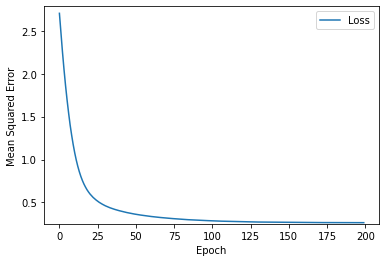


 Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
1/1 [==============================] - 0s 1ms/step - loss: 0.4921 - mean_squared_error: 0.2843


[0.4921499192714691, 0.28434568643569946]

In [104]:
# Hyperparameters.
learning_rate = 0.001
epochs = 200
batch_size = 1000
n_layers = 1
n_nodes = [15]

# Specify the label
label_name = "price"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer, n_layers, n_nodes)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, train_df_norm, epochs, 
                          label_name, batch_size)
plot_loss_curve(epochs, mse)

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

In [99]:
# Node tuning
learning_rate = 0.0015
epochs = 100
batch_size = 1000
n_layers = 1
n_nodes = [[25], [15], [10]]

# Test data
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label

average_mses = []
for nodes in n_nodes:
    mse_simulation = []
    # 10 simulations for each node hyperparamter
    for i in range(10):
        # Specify the label
        label_name = "price"

        # Establish the model's topography.
        my_model = create_model(learning_rate, my_feature_layer, n_layers, nodes)

        # Train the model on the normalized training set. We're passing the entire
        # normalized training set, but the model will only use the features
        # defined by the feature_layer.
        epoch, mse = train_model(my_model, train_df_norm, epochs, 
                                label_name, batch_size)
        
        # After building a model against the training set, test that model
        # against the test set.
        print("\n Evaluate the new model against the test set:")
        mse = my_model.evaluate(x = test_features, 
                                y = test_label, 
                                batch_size=batch_size)[1]
        mse_simulation.append(mse)                        
        print('Training MSE:', mse)
        print('+'*75)
    average_mse = np.array(mse_simulation).mean()
    average_mses.append(average_mse)

ms_4:0' shape=(None, 1) dtype=float32>, 'car_friendly': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float32>, 'historic': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=float32>, 'quiet': <tf.Tensor 'ExpandDims_25:0' shape=(None, 1) dtype=float32>, 'elementary_schools': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float32>, 'high_schools': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=float32>, 'parks': <tf.Tensor 'ExpandDims_19:0' shape=(None, 1) dtype=float32>, 'nightlife': <tf.Tensor 'ExpandDims_18:0' shape=(None, 1) dtype=float32>, 'groceries': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float32>, 'daycares': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=float32>, 'pedestrian_friendly': <tf.Tensor 'ExpandDims_20:0' shape=(None, 1) dtype=float32>, 'cafes': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float32>, 'transit_friendly': <tf.Tensor 'ExpandDims_31:0' shape=(None, 1) dtype=float32>, 'greenery': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dty

In [100]:
print('Average mses for number of nodes:')
for i in range(len(n_nodes)):
    print(n_nodes[i], 'number of nodes: average mse =', average_mses[i])

Average mses for number of nodes:
[25] number of nodes: average mse = 0.29215354323387144
[15] number of nodes: average mse = 0.2897717922925949
[10] number of nodes: average mse = 0.31062056720256803


One layer performs best, with similar results using ReLu and Tanh activation.
There doesn't seem to be a significant diffence in the performance of the linear and non linear nets. The simplest model will be chosen.

In [107]:
my_model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_3 (DenseFeatu multiple                  0         
_________________________________________________________________
Hidden0 (Dense)              multiple                  585       
_________________________________________________________________
Output (Dense)               multiple                  16        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


I had issues saving and loading the previous model which seemed to be due to the tf.feature_colum representation of the data. I therefore created another model to allow proper saving and loading.

## Save Linear Model as File

In [34]:
def get_model():
    # Create a simple model.
    inputs = keras.Input(shape=(18,))
    outputs = keras.layers.Dense(1)(inputs)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

In [35]:
# for b in boolean_features:
#     train_df_norm[b] = train_df_norm[b].apply(lambda x: 1 if x == 'True' else 0)
#     test_df_norm[b] = test_df_norm[b].apply(lambda x: 1 if x == 'True' else 0)
# test_df_norm[boolean_features]

In [36]:
test_df_norm.columns

Index(['price', 'lat', 'long', 'restaurants', 'vibrant', 'cycling_friendly',
       'car_friendly', 'historic', 'quiet', 'parks', 'groceries', 'cafes',
       'transit_friendly', 'greenery', 'year_built', 'walk_score', 'bedrooms',
       'bathrooms', 'powder_rooms', 'total_area', 'mr_distance'],
      dtype='object')

In [37]:
def train_model(model, dataset, epochs, label_name):
    """Feed a dataset into the model in order to train it."""

    # Split the dataset into features and label.
    features = dataset.copy()
    label = np.array(features.pop(label_name))
    feature = features.to_numpy()
    history = model.fit(x=features, y=label,
                        epochs=epochs)

    # Get details that will be useful for plotting the loss curve.
    epoch = history.epoch
    rmse = history.history["loss"]

    return epoch, rmse   

In [95]:
# Specify the label, batchsize and model
label_name = "price"
batch_size = 1000
model = get_model()

# Train the model.
epochs, mse = train_model(model, train_df_norm.drop(['lat', 'long'], axis=1), 100, label_name)

# Validation
test_features = test_df_norm.iloc[:, 3 :].to_numpy()
test_label = np.array(test_df_norm.price) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
model.evaluate(x = test_features, y = test_label)

Epoch 1/100
48/48 [==============================] - 0s 1ms/step - loss: 288560611328.0000
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 288560513024.0000
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 288560349184.0000
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 288560250880.0000
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 288560185344.0000
Epoch 6/100
48/48 [==============================] - 0s 986us/step - loss: 288560054272.0000
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 288559955968.0000
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 288559857664.0000
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 288559792128.0000
Epoch 10/100
48/48 [==============================] - 0s 970us/step - loss: 288559595520.0000
Epoch 11/100
48/48 [==============================] - 0s 1ms/step - loss: 28855952998

327530446848.0

In [98]:
np.sqrt(327530446848.0)

572302.7580293494

In [42]:
# Save model as 'tf'
# model.save('web-app/tf_linear_model_2')

# Load model
reconstructed_model = keras.models.load_model('web-app/tf_linear_model_2', compile=True)
reconstructed_model.summary()

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 18)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 19        
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Testing
test_input = test_df_norm.iloc[:, 3:]
test_target = test_df_norm.price.to_numpy()

In [73]:
preds = model.predict(test_input.to_numpy())
preds.shape

array([[-0.11492658],
       [-0.32514444],
       [-0.30683163],
       [-0.9980568 ],
       [-0.5387163 ],
       [ 0.4361036 ],
       [ 0.23225535],
       [ 0.6241727 ],
       [ 0.4155161 ],
       [ 0.63147104],
       [-0.47266498],
       [-0.8737802 ],
       [ 0.05246219],
       [-0.6265605 ],
       [-0.1915634 ],
       [-0.412644  ],
       [-0.31058612],
       [-0.8018513 ],
       [-0.21564727],
       [-0.18644427],
       [-0.6432509 ],
       [ 1.7280805 ],
       [-0.21413948],
       [-1.0032072 ],
       [ 0.06475769],
       [ 0.56328803],
       [ 0.09766158],
       [-0.38006327],
       [ 0.20624168],
       [-0.9213267 ],
       [ 0.3620706 ],
       [ 0.9839985 ],
       [ 0.81079495],
       [-0.5890024 ],
       [-1.0365664 ],
       [ 1.2487364 ],
       [ 0.44970426],
       [-0.38488922],
       [ 0.31931454],
       [ 0.14672104],
       [-0.40817285],
       [ 1.2096558 ],
       [ 1.0524616 ],
       [ 0.00970267],
       [-0.02101753],
       [-0

In [72]:
# Compute prediction differences for test set
diffs = (preds - test_target)
# Standard deviation of residuals
(diffs < test_target).sum()

122314

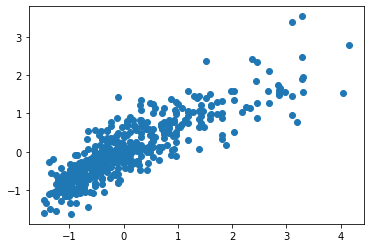

In [57]:
plt.scatter(test_target, preds)

In [409]:
# Feature weights
feature_names = test_df_norm.iloc[:, 3:].columns
def feature_importance():
    perm = PermutationImportance(reconstructed_model, 
                             scoring='neg_mean_squared_error',
                             random_state=1).fit(test_input, test_target)
    weights = eli5.explain_weights_df(perm,   
                            feature_names=feature_names.tolist(),
                            top = 31)
    return weights
pd.set_option('display.max_rows', 500)
weights = feature_importance()
weights.weight = weights.weight * 1000000
weights

,feature,weight,std
0,total_area,650565.8,0.0
1,bathrooms,146965.0,0.0
2,mr_distance,96264.2,0.0
3,cafes,50728.9,0.0
4,groceries,24673.7,0.0
5,vibrant,21650.4,0.0
6,parks,17471.3,0.0
7,bedrooms,17278.0,0.0
8,year_built,15169.6,0.0
9,historic,12811.9,0.0


In [411]:
top_11 = weights[: 11]
top_11.weight = 100 * top_11.weight / top_11.weight.sum()
top_11.sort_values(by='weight', ascending=True, inplace=True)
top_11.feature = ['Restaurants', 'Bedrooms', 'Transit Friendly', 'Parks',
                'Year Built', 'Historic', 'Cafes', 'Groceries', 'Downtown Distance',
                'Bathrooms', 'Total Area']
top_11.to_csv('web-app/data/top_11_features.csv')
top_11

,feature,weight,std
10,Restaurants,1.1,0.0
9,Bedrooms,1.2,0.0
8,Transit Friendly,1.4,0.0
7,Parks,1.6,0.0
6,Year Built,1.6,0.0
5,Historic,2.0,0.0
4,Cafes,2.3,0.0
3,Groceries,4.8,0.0
2,Downtown Distance,9.0,0.0
1,Bathrooms,13.8,0.0
